In [1]:
from fastai.vision.all import *

In [2]:
set_seed(0)
n = 10
angles = torch.randn(n) * np.pi / 4
orig_angles = angles.clone() # for later

In [3]:
def compute_positions(relative_angles):
    angles = relative_angles.cumsum(dim=0)
    deltas = torch.stack([angles.cos(), angles.sin()])
    end_positions = deltas.cumsum(dim=1)
    return torch.cat([torch.zeros(2, 1), end_positions], dim=1).T

In [4]:
def show_chain(positions):
    n = len(positions)
    xs, ys = positions.T
    line = plt.plot(xs, ys, marker='o')
    plt.gca().set_xlim(-n, n); plt.gca().set_ylim(-n, n)
    return line

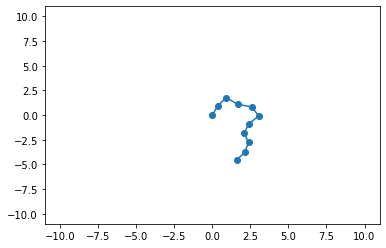

In [5]:
positions = compute_positions(angles)
show_chain(positions)

In [6]:
# Examine positions
positions.shape

torch.Size([11, 2])

In [7]:
positions

tensor([[ 0.0000,  0.0000],
        [ 0.3527,  0.9357],
        [ 0.9099,  1.7661],
        [ 1.6542,  1.0982],
        [ 2.6138,  0.8171],
        [ 3.0344, -0.0901],
        [ 2.4178, -0.8774],
        [ 2.0772, -1.8176],
        [ 2.3828, -2.7698],
        [ 2.1313, -3.7376],
        [ 1.5907, -4.5789]])

The first number represents the number of points (where the links join together) on the chain. The second number represents the number of "dimensions" that each point contains (the first being the x value and the second being the y value). From a matrix/dimensional point of view, the first number is the number of rows and the second number is the number of columns in the tensor.

In [62]:
# Initial work-through for loop
angles = orig_angles.clone().requires_grad_()

positions = compute_positions(angles)
end_position = tensor(positions[-1])

# Get loss and back propogate
loss = n - end_position[0]
loss.backward()

# Step down the gradient of angles
angles.data -= angles.grad * lr

In [68]:
# Show loss
loss

tensor(8.4093, grad_fn=<RsubBackward1>)

After computing loss.backward(), loss became a tensor containing two items. The first item is the numerical loss value, and the second item is the flag 'grad_fn'.

In [65]:
# Compare angles and angles.grad
angles

tensor([ 1.2561, -0.1753, -1.6478,  0.5032, -0.7978, -1.0536,  0.3538,  0.6858,
        -0.5468, -0.3084], requires_grad=True)

In [66]:
angles.grad

tensor([-4.5789, -5.5146, -6.3451, -5.6772, -5.3961, -4.4888, -3.7015, -2.7613,
        -1.8091, -0.8413])

Angles.grad has the same shape as angles (same amount of numbers), minus the 'requires_grad' flag.

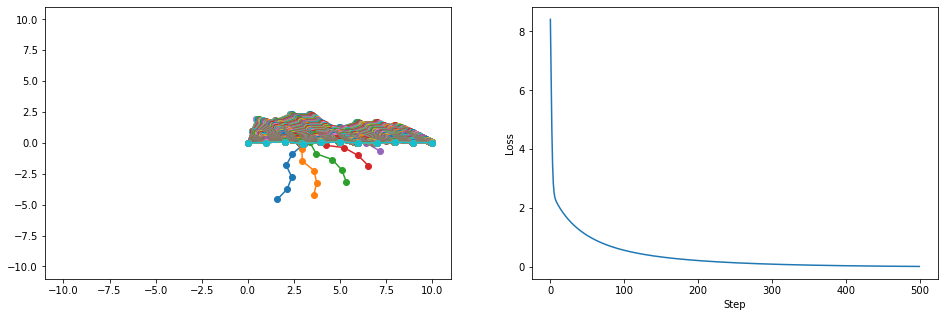

In [70]:
# Create loop
maxIterations = 500
lr = 0.01
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
plt.sca(ax1) # use the left plot to show the chain
angles = orig_angles.clone().requires_grad_()
losses = []
for i in range(maxIterations):

    # Get end position
    positions = compute_positions(angles)
    show_chain(positions.detach())
    end_position = tensor(positions[-1])
    
    # Calculate and back propogate through loss
    loss = n - end_position[0]
    losses.append(loss.item())
    loss.backward()
    
    # Step down the gradient of angles
    angles.data -= angles.grad * lr
    
    # Zero the gradient
    angles.grad.zero_()

# Plot the losses
ax2.plot(losses); ax2.set(ylabel="Loss", xlabel="Step");